In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
df = pd.read_csv('/content/concrete_data.csv')

In [26]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [27]:
df.shape

(1030, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


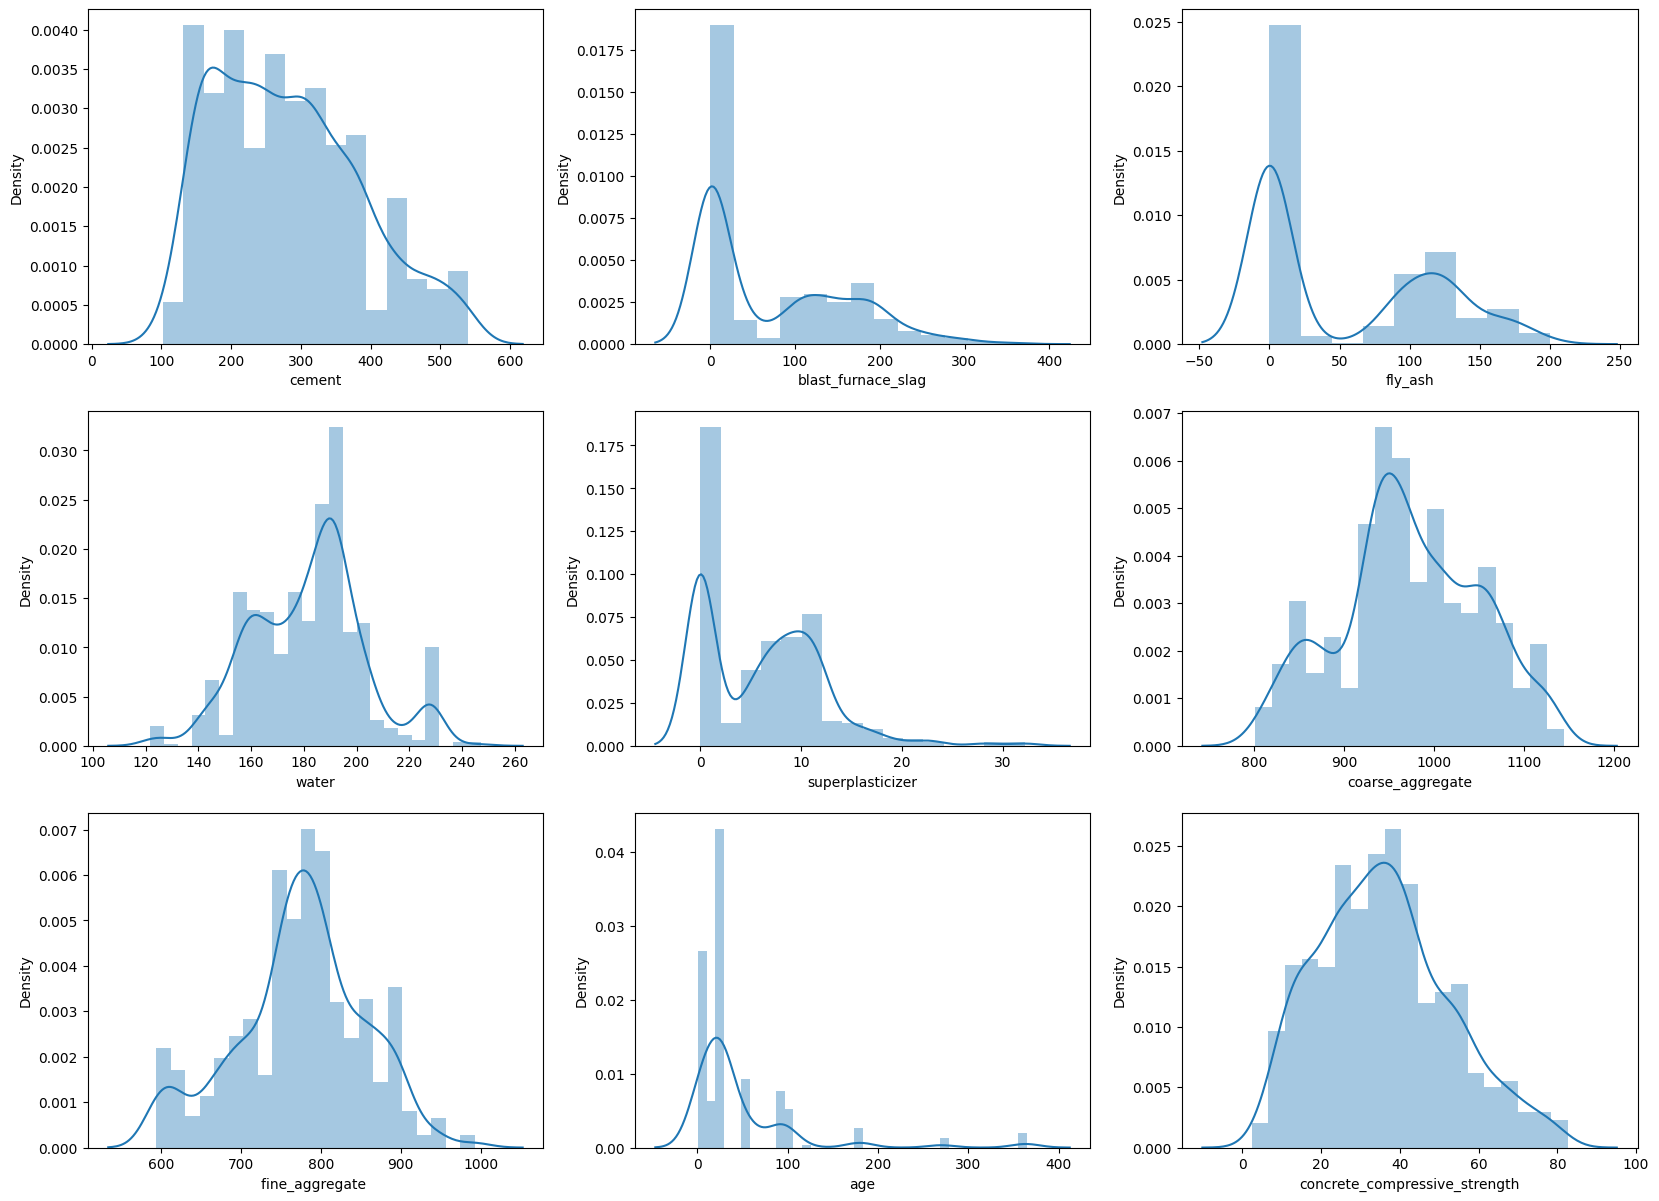

In [29]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

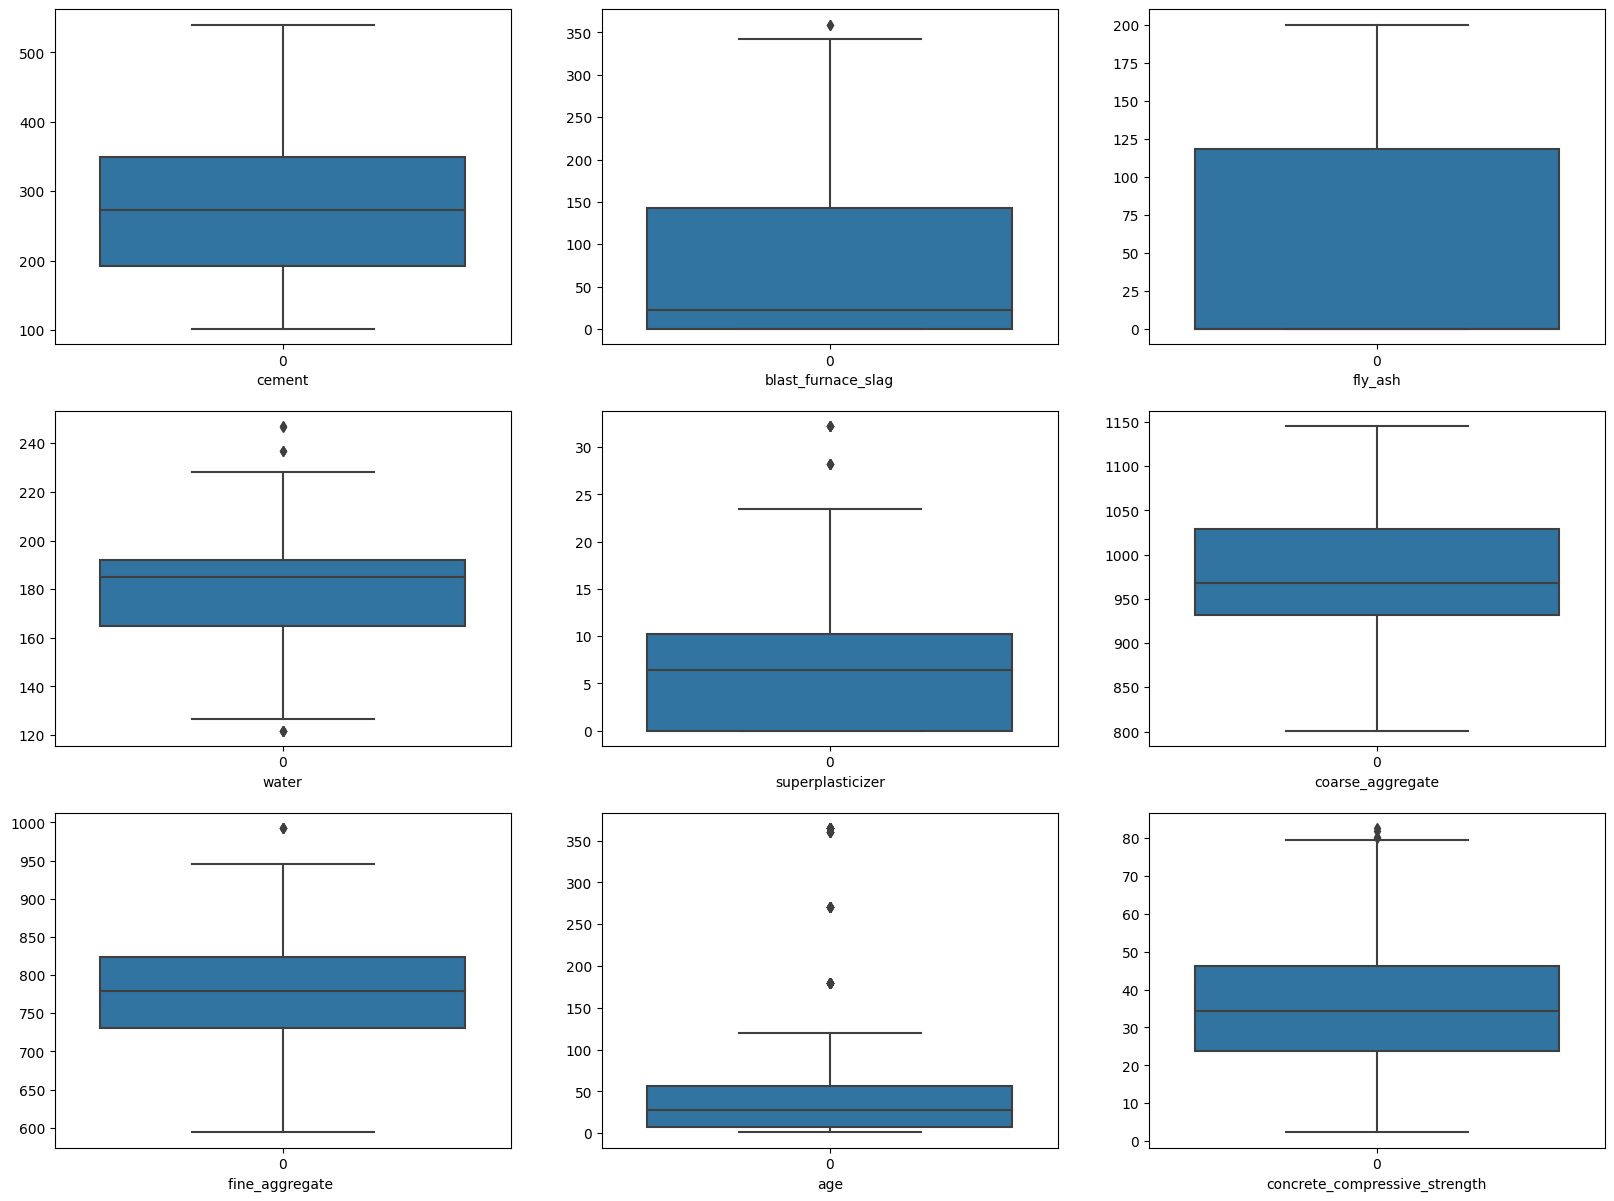

In [30]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [31]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [32]:
X = df.drop('concrete_compressive_strength',axis=1)
y = df['concrete_compressive_strength']

In [33]:
# before doing the log transformation,
#let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0
for column in X.columns:
    X[column]+=1
    X[column]=np.log(X[column])

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
print(f'shape of X_train : {X_train.shape}')
print(f'shape of X_test : {X_test.shape}')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of X_train : (824, 8)
shape of X_test : (206, 8)
shape of y_train : (824,)
shape of y_test : (206,)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [38]:
regressor = Sequential()
regressor.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=8))
regressor.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
regressor.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='linear'))

In [39]:
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [40]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                90        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model_history = regressor.fit(X_train,y_train,batch_size=10,epochs=20)


Epoch 1/20
83/83 [==============================] - 1s 3ms/step - loss: 1587.2988 - mae: 36.1584
Epoch 2/20
83/83 [==============================] - 0s 3ms/step - loss: 1496.7704 - mae: 34.7552
Epoch 3/20
83/83 [==============================] - 0s 3ms/step - loss: 1323.6407 - mae: 31.9971
Epoch 4/20
83/83 [==============================] - 0s 3ms/step - loss: 1022.6389 - mae: 27.1991
Epoch 5/20
83/83 [==============================] - 0s 3ms/step - loss: 667.7203 - mae: 21.0075
Epoch 6/20
83/83 [==============================] - 0s 3ms/step - loss: 391.9643 - mae: 15.5031
Epoch 7/20
83/83 [==============================] - 0s 3ms/step - loss: 225.4035 - mae: 11.7575
Epoch 8/20
83/83 [==============================] - 0s 3ms/step - loss: 148.5814 - mae: 9.6704
Epoch 9/20
83/83 [==============================] - 0s 3ms/step - loss: 117.3258 - mae: 8.7079
Epoch 10/20
83/83 [==============================] - 0s 3ms/step - loss: 104.2496 - mae: 8.2498
Epoch 11/20
83/83 [===================

In [42]:
y_pred = regressor.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = round(mean_squared_error(y_true=y_test,y_pred=y_pred),2)
MAE = round(mean_absolute_error(y_true=y_test,y_pred=y_pred),2)
RMSE = round(np.sqrt(MSE),2)
r_squared = round(r2_score(y_true=y_test,y_pred=y_pred),2)
adjusted_r_squared =  round(1-((1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),2)
print(f'MSE : {MSE}\nMAE : {MAE}\nRMSE : {RMSE}')
print(f'r2_score : {r_squared}')
print(f"adjusted_r2_score : {adjusted_r_squared}")

MSE : 64.98
MAE : 6.27
RMSE : 8.06
r2_score : 0.75
adjusted_r2_score : 0.74


In [44]:
X_train, X_validation = train_test_split(X_train, test_size=0.2, random_state=42)
y_train, y_validation = train_test_split(y_train,test_size=0.2,random_state=42)

print(f'shape of X_train : {X_train.shape}')
print(f'shape of X_validation : {X_validation.shape}')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_validation : {y_validation.shape}')

shape of X_train : (659, 8)
shape of X_validation : (165, 8)
shape of y_train : (659,)
shape of y_validation : (165,)


In [45]:
pip install keras-tuner


In [46]:
# hyperparamer tuning
from tensorflow.keras import optimizers
from kerastuner.tuners import RandomSearch
def build_model(hp):
  model = Sequential()
  model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),activation='relu'))
  model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),activation='relu'))
  model.add(Dense(units=1,activation='linear'))

  model.compile(optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
                 loss='mean_squared_error', metrics=['mse'])

  return model

  # initializer the tuner
tuner = RandomSearch(
    build_model,
    objective='mse',
    max_trials=5, # The maximum number of hyperparameter combinations to try.
    directory='my_tuner_dir',
    project_name='my_tuner_project'
)

# Search for the Best Hyperparameters:
# Perform the search for the best hyperparameters using the 'search' method.
tuner.search(X_train, y_train, epochs=5, validation_data=(X_validation, y_validation))

# Get the Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Best HyperParameters : {best_hps.values}\n')

# we can use best_hps to build and train the final model with the chosen hyperparameters.
final_model = tuner.hypermodel.build(best_hps)
final_model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Evaluate the Final Model

y_pred = final_model.predict(X_test)
MSE = round(mean_squared_error(y_true=y_test,y_pred=y_pred),2)
MAE = round(mean_absolute_error(y_true=y_test,y_pred=y_pred),2)
RMSE = round(np.sqrt(MSE),2)
r_squared = round(r2_score(y_true=y_test,y_pred=y_pred),2)
adjusted_r_squared =  round(1-((1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),2)
print(f'MSE : {MSE}\nMAE : {MAE}\nRMSE : {RMSE}')
print(f'r2_score : {r_squared}')
print(f"adjusted_r2_score : {adjusted_r_squared}")





Trial 5 Complete [00h 00m 07s]
mse: 60.85187530517578

Best mse So Far: 50.694244384765625
Total elapsed time: 00h 00m 23s
Best HyperParameters : {'units': 416, 'learning_rate': 0.01}

Epoch 1/10
21/21 [==============================] - 4s 21ms/step - loss: 391.0655 - mse: 391.0655 - val_loss: 114.6074 - val_mse: 114.6074
Epoch 2/10
21/21 [==============================] - 0s 8ms/step - loss: 87.5453 - mse: 87.5453 - val_loss: 63.3264 - val_mse: 63.3264
Epoch 3/10
21/21 [==============================] - 0s 9ms/step - loss: 64.3629 - mse: 64.3629 - val_loss: 48.3308 - val_mse: 48.3308
Epoch 4/10
21/21 [==============================] - 0s 7ms/step - loss: 55.0743 - mse: 55.0743 - val_loss: 46.8424 - val_mse: 46.8424
Epoch 5/10
21/21 [==============================] - 0s 7ms/step - loss: 52.8909 - mse: 52.8909 - val_loss: 51.3724 - val_mse: 51.3724
Epoch 6/10
21/21 [==============================] - 0s 7ms/step - loss: 54.5147 - mse: 54.5147 - val_loss: 50.4891 - val_mse: 50.4891
Epoch 